In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from obspy.taup import TauPyModel
from obspy.geodetics import degrees2kilometers, kilometer2degrees, gps2dist_azimuth
from mudpy import fakequakes
from matplotlib.lines import Line2D
import matplotlib as mpl 
import matplotlib.colors as colors
from matplotlib.colors import Normalize

In [3]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [4]:
path = '/Users/sydneydybing/SW4/strain/experiments/'
results_path = path + 'talapas/results/homogeneous/'
plot_save_path = path + 'results_plots/'

dirs_list = sorted((f for f in os.listdir(results_path) if not f.startswith('.')), key = str.lower)
print(dirs_list)

models = ['MH2017', 'MH2017-1', 'MH2017+1']

events = pd.read_csv(path + 'homo_events.csv')
rupt_patterns_only = events.iloc[[0,3,6,9]]
rupt_patterns_only

['large_slip_area_1', 'medium_slip_area_2', 'small_slip_area_3', 'surface_slip_area_4']


,rupt_num,longitude,latitude,depth,rise_time
0,2,-117.622955,35.777562,14.58,2.8
3,3,-118.049495,36.180743,10.10,2.8
6,1,-117.583453,35.745836,10.10,2.8
9,4,-117.657729,35.824579,2.63,2.8


In [5]:
extra_stas = pd.read_csv(path + 'extra_stas.csv')
extra_stas

,name,lon,lat
0,E1,-119.0,34.50
1,E2,-119.0,34.75
2,E3,-119.0,35.00
3,E4,-119.0,35.25
4,E5,-119.0,35.50
...,...,...,...
138,E139,-116.0,36.00
139,E140,-116.0,36.25
140,E141,-116.0,36.50
141,E142,-116.0,36.75


In [6]:
# Fault strike = 139 degrees up from east

In [7]:
# Calculate theoretical P-wave arrival times

# Make or load our custom TauPyModel format velocity model
custom_model = TauPyModel(model = path + 'mojave_simpletop_forsw4.npz')

# Add a column to the stations dataframe with the theoretical P-wave arrival times

for idx in range(len(rupt_patterns_only)):
    
    dists_km = []
    p_arr_times = []
    azs = []
    
    rupt_num = rupt_patterns_only['rupt_num'].values[idx]
    hypo_lat = rupt_patterns_only['latitude'].values[idx]
    hypo_lon = rupt_patterns_only['longitude'].values[idx]
    hypo_depth = rupt_patterns_only['depth'].values[idx] # km
    
    print(idx, rupt_num)
    print(hypo_lat, hypo_lon, hypo_depth)

    for idx2 in range(len(extra_stas)):

        sta_lat = extra_stas['lat'].values[idx2]
        sta_lon = extra_stas['lon'].values[idx2]
        
        # print(sta_lat, sta_lon)

        dist_m, az, baz = gps2dist_azimuth(hypo_lat, hypo_lon, sta_lat, sta_lon) # dist in meters, az is angle in degrees from hypo to sta
        # print(round(dist_m/1000,1))

        arrivals = custom_model.get_travel_times(source_depth_in_km = hypo_depth, 
                                      distance_in_degree = kilometer2degrees(dist_m/1000), phase_list=['p', 'P'])
        p_arr_time = arrivals[0].time

        p_arr_times.append(p_arr_time)
        dists_km.append(dist_m/1000)
        azs.append(az)

    if idx == 0:
        # Rupt num 2
        extra_stas['medium_slip_area_2_hypo_dist_km'] = dists_km
        extra_stas['medium_slip_area_2_p_arrival'] = p_arr_times
        extra_stas['medium_slip_area_2_azs'] = azs
    elif idx == 1:
        # Rupt num 3
        extra_stas['small_slip_area_3_hypo_dist_km'] = dists_km
        extra_stas['small_slip_area_3_p_arrival'] = p_arr_times
        extra_stas['small_slip_area_3_azs'] = azs
    elif idx == 2:
        # Rupt num 1
        extra_stas['large_slip_area_1_hypo_dist_km'] = dists_km
        extra_stas['large_slip_area_1_p_arrival'] = p_arr_times
        extra_stas['large_slip_area_1_azs'] = azs
    elif idx == 3:
        # Rupt num 4
        extra_stas['surface_slip_area_4_hypo_dist_km'] = dists_km
        extra_stas['surface_slip_area_4_p_arrival'] = p_arr_times
        extra_stas['surface_slip_area_4_azs'] = azs

0 2
35.777562 -117.622955 14.58


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_46113/4118293140.py:29: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  dist_m, az, baz = gps2dist_azimuth(hypo_lat, hypo_lon, sta_lat, sta_lon) # dist in meters, az is angle in degrees from hypo to sta


1 3
36.180743 -118.049495 10.1


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_46113/4118293140.py:29: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  dist_m, az, baz = gps2dist_azimuth(hypo_lat, hypo_lon, sta_lat, sta_lon) # dist in meters, az is angle in degrees from hypo to sta


2 1
35.745836 -117.583453 10.1


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_46113/4118293140.py:29: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  dist_m, az, baz = gps2dist_azimuth(hypo_lat, hypo_lon, sta_lat, sta_lon) # dist in meters, az is angle in degrees from hypo to sta


3 4
35.824579 -117.657729 2.63


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_46113/4118293140.py:29: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  dist_m, az, baz = gps2dist_azimuth(hypo_lat, hypo_lon, sta_lat, sta_lon) # dist in meters, az is angle in degrees from hypo to sta


In [8]:
extra_stas

,name,lon,lat,medium_slip_area_2_hypo_dist_km,medium_slip_area_2_p_arrival,medium_slip_area_2_azs,small_slip_area_3_hypo_dist_km,small_slip_area_3_p_arrival,small_slip_area_3_azs,large_slip_area_1_hypo_dist_km,large_slip_area_1_p_arrival,large_slip_area_1_azs,surface_slip_area_4_hypo_dist_km,surface_slip_area_4_p_arrival,surface_slip_area_4_azs
0,E1,-119.0,34.50,189.305303,28.691339,221.920311,205.517271,31.132456,205.138544,189.140065,29.123696,223.460773,191.176748,30.201185,220.154825
1,E2,-119.0,34.75,169.399918,26.249828,228.102746,180.667549,28.084493,208.801211,169.783016,26.749442,229.814934,170.649958,27.683455,226.074043
2,E3,-119.0,35.00,151.967294,24.111616,235.812413,156.786708,25.105961,213.604470,153.024407,24.554535,237.677243,152.420986,25.032892,233.505849
3,E4,-119.0,35.25,137.948780,22.071224,245.294513,134.392946,21.823792,220.067620,139.802514,22.616652,247.240044,137.408098,22.807009,242.749746
4,E5,-119.0,35.50,128.467679,20.681614,256.532038,114.364021,18.825142,228.944882,131.191786,21.354610,258.413410,126.759943,21.184368,253.886937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,E139,-116.0,36.00,148.598871,23.632167,79.964377,185.661730,28.697058,95.596785,145.751134,23.488518,78.380435,150.891014,24.808650,82.102874
139,E140,-116.0,36.25,155.411323,24.534046,69.811553,184.442979,28.547572,87.006848,153.339487,24.600715,68.139727,156.674188,25.656268,71.978645
140,E141,-116.0,36.50,166.621419,25.909029,60.766102,187.368213,28.906368,78.495347,165.292432,26.198646,59.119893,166.926462,27.158905,62.835198
141,E142,-116.0,36.75,181.416296,27.723707,53.025284,194.250807,29.750558,70.416080,180.746663,28.094197,51.476072,180.890076,28.939465,54.923649


In [9]:
extra_stas.to_csv(path + 'extra_stas_w_travel_times_azimuths_azgroups.csv', index = False)

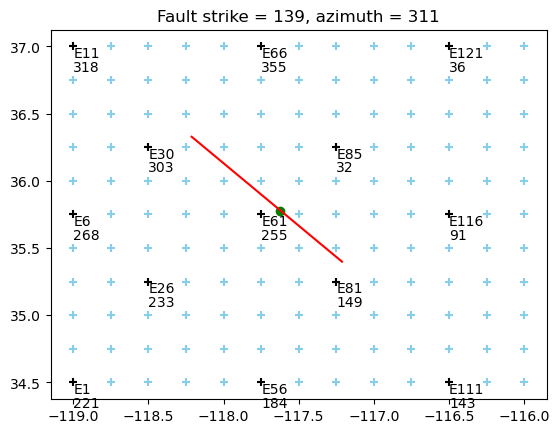

In [10]:
# Pick a few stations

stas_sub = extra_stas.iloc[[0,5,10,25,29,55,60,65,80,84,110,115,120]]
# stas_sub['lon'].values

# Fault extent
min_lon = -118.2123
max_lon = -117.2121
min_lat = 35.3989
max_lat = 36.3284

plt.title('Fault strike = 139, azimuth = 311')
plt.plot([min_lon, max_lon], [max_lat, min_lat], color = 'red', label = 'Planar fault extent')   
plt.scatter(extra_stas['lon'], extra_stas['lat'], marker = '+', color = 'skyblue', label = 'Extra stations')
plt.scatter(stas_sub['lon'], stas_sub['lat'], marker = '+', color = 'black', label = 'Extra stations')
plt.scatter(events['longitude'][0], events['latitude'][0], color = 'green', label = 'Rupture 2 (medium)')
[plt.text(i, j, f'{name}', va = 'top', ha = 'left') for (i, j, name) in zip(stas_sub['lon'], stas_sub['lat'], stas_sub['name'])];
[plt.text(i, j, f'{name}', va = 'top', ha = 'left') for (i, j, name) in zip(stas_sub['lon'], stas_sub['lat']-0.1, stas_sub['medium_slip_area_2_azs'].astype(int))];



In [13]:
extra_stas

,name,lon,lat,medium_slip_area_2_hypo_dist_km,medium_slip_area_2_p_arrival,medium_slip_area_2_azs,small_slip_area_3_hypo_dist_km,small_slip_area_3_p_arrival,small_slip_area_3_azs,large_slip_area_1_hypo_dist_km,large_slip_area_1_p_arrival,large_slip_area_1_azs,surface_slip_area_4_hypo_dist_km,surface_slip_area_4_p_arrival,surface_slip_area_4_azs
0,E1,-119.0,34.50,189.305303,28.691339,221.920311,205.517271,31.132456,205.138544,189.140065,29.123696,223.460773,191.176748,30.201185,220.154825
1,E2,-119.0,34.75,169.399918,26.249828,228.102746,180.667549,28.084493,208.801211,169.783016,26.749442,229.814934,170.649958,27.683455,226.074043
2,E3,-119.0,35.00,151.967294,24.111616,235.812413,156.786708,25.105961,213.604470,153.024407,24.554535,237.677243,152.420986,25.032892,233.505849
3,E4,-119.0,35.25,137.948780,22.071224,245.294513,134.392946,21.823792,220.067620,139.802514,22.616652,247.240044,137.408098,22.807009,242.749746
4,E5,-119.0,35.50,128.467679,20.681614,256.532038,114.364021,18.825142,228.944882,131.191786,21.354610,258.413410,126.759943,21.184368,253.886937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,E139,-116.0,36.00,148.598871,23.632167,79.964377,185.661730,28.697058,95.596785,145.751134,23.488518,78.380435,150.891014,24.808650,82.102874
139,E140,-116.0,36.25,155.411323,24.534046,69.811553,184.442979,28.547572,87.006848,153.339487,24.600715,68.139727,156.674188,25.656268,71.978645
140,E141,-116.0,36.50,166.621419,25.909029,60.766102,187.368213,28.906368,78.495347,165.292432,26.198646,59.119893,166.926462,27.158905,62.835198
141,E142,-116.0,36.75,181.416296,27.723707,53.025284,194.250807,29.750558,70.416080,180.746663,28.094197,51.476072,180.890076,28.939465,54.923649


In [14]:
rupt_patterns_only

,rupt_num,longitude,latitude,depth,rise_time
0,2,-117.622955,35.777562,14.58,2.8
3,3,-118.049495,36.180743,10.10,2.8
6,1,-117.583453,35.745836,10.10,2.8
9,4,-117.657729,35.824579,2.63,2.8


In [45]:
# Group subset by location/azimuth

fault_az = 311

for idx in range(len(rupt_patterns_only)):
    rupt = rupt_patterns_only['rupt_num'].values[idx]
    print(rupt)
    if idx == 0:
        rupt_name = 'medium_slip_area_2'
    elif idx == 1:
        rupt_name = 'small_slip_area_3'
    elif idx == 2:
        rupt_name = 'large_slip_area_1'
    elif idx == 3:
        rupt_name = 'surface_slip_area_4'
    
    groups = []
    az_diffs = []
    
    for i in range(len(extra_stas)):
        
        # print(extra_stas['name'].values[i])
        sta_az = extra_stas[rupt_name + '_azs'].values[i]
        az_diff = fault_az - sta_az
        # print(int(sta_az), int(az_diff))
        az_diffs.append(az_diff)
        # print(az_diff)
        
        if -90 < az_diff <= -45:
            groups.append('-90--45')
            print('this one')
        elif -45 < az_diff <= 0:
            groups.append('-45-0')
        elif 0 < az_diff <= 45:
            groups.append('0-45')
        elif 45 < az_diff <= 90:
            groups.append('45-90')
        elif 90 < az_diff <= 135:
            groups.append('90-135')
        elif 135 < az_diff <= 180:
            groups.append('135-180')
        elif 180 < az_diff <= 225:
            groups.append('180-225')
        elif 225 < az_diff <= 270:
            groups.append('225-270')
        elif 270 < az_diff <= 315:
            groups.append('270-315')
        elif 315 < az_diff <= 360:
            groups.append('315-360')
    
    extra_stas[rupt_name + '_az_group'] = groups

2
3
1
4
this one


In [40]:
extra_stas

,name,lon,lat,medium_slip_area_2_hypo_dist_km,medium_slip_area_2_p_arrival,medium_slip_area_2_azs,small_slip_area_3_hypo_dist_km,small_slip_area_3_p_arrival,small_slip_area_3_azs,large_slip_area_1_hypo_dist_km,large_slip_area_1_p_arrival,large_slip_area_1_azs,surface_slip_area_4_hypo_dist_km,surface_slip_area_4_p_arrival,surface_slip_area_4_azs,medium_slip_area_2_az_group,small_slip_area_3_az_group,large_slip_area_1_az_group,surface_slip_area_4_az_group
0,E1,-119.0,34.50,189.305303,28.691339,221.920311,205.517271,31.132456,205.138544,189.140065,29.123696,223.460773,191.176748,30.201185,220.154825,45-90,90-135,45-90,90-135
1,E2,-119.0,34.75,169.399918,26.249828,228.102746,180.667549,28.084493,208.801211,169.783016,26.749442,229.814934,170.649958,27.683455,226.074043,45-90,90-135,45-90,45-90
2,E3,-119.0,35.00,151.967294,24.111616,235.812413,156.786708,25.105961,213.604470,153.024407,24.554535,237.677243,152.420986,25.032892,233.505849,45-90,90-135,45-90,45-90
3,E4,-119.0,35.25,137.948780,22.071224,245.294513,134.392946,21.823792,220.067620,139.802514,22.616652,247.240044,137.408098,22.807009,242.749746,45-90,90-135,45-90,45-90
4,E5,-119.0,35.50,128.467679,20.681614,256.532038,114.364021,18.825142,228.944882,131.191786,21.354610,258.413410,126.759943,21.184368,253.886937,45-90,45-90,45-90,45-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,E139,-116.0,36.00,148.598871,23.632167,79.964377,185.661730,28.697058,95.596785,145.751134,23.488518,78.380435,150.891014,24.808650,82.102874,225-270,180-225,225-270,225-270
139,E140,-116.0,36.25,155.411323,24.534046,69.811553,184.442979,28.547572,87.006848,153.339487,24.600715,68.139727,156.674188,25.656268,71.978645,225-270,180-225,225-270,225-270
140,E141,-116.0,36.50,166.621419,25.909029,60.766102,187.368213,28.906368,78.495347,165.292432,26.198646,59.119893,166.926462,27.158905,62.835198,225-270,225-270,225-270,225-270
141,E142,-116.0,36.75,181.416296,27.723707,53.025284,194.250807,29.750558,70.416080,180.746663,28.094197,51.476072,180.890076,28.939465,54.923649,225-270,225-270,225-270,225-270


In [41]:
extra_stas.to_csv(path + 'extra_stas_w_travel_times_azimuths_azgroups.csv', index = False)

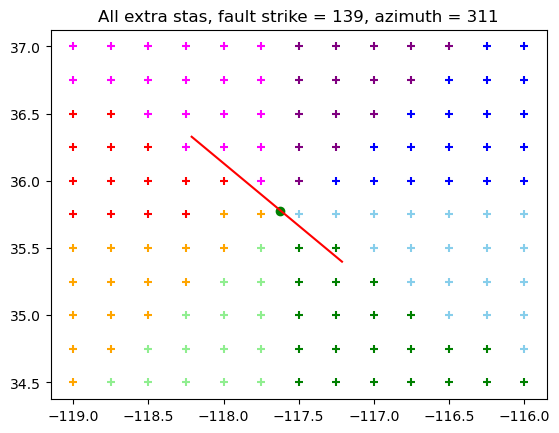

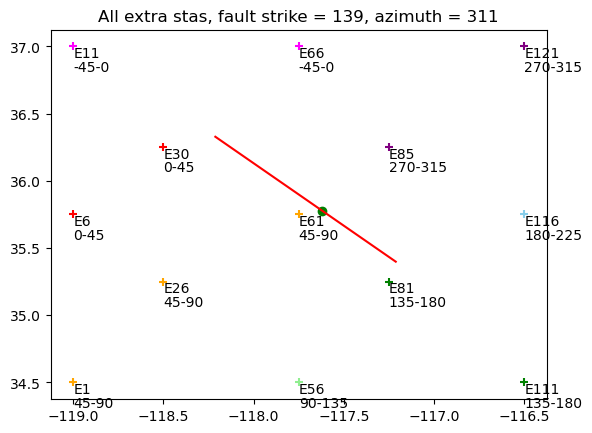

In [49]:
plt.title('All extra stas, fault strike = 139, azimuth = 311')
plt.plot([min_lon, max_lon], [max_lat, min_lat], color = 'red', label = 'Planar fault extent')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '-90--45'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '-90--45'], marker = '+', color = 'pink', label = 'Extra stations')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '-45-0'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '-45-0'], marker = '+', color = 'magenta', label = 'Extra stations')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '0-45'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '0-45'], marker = '+', color = 'red', label = 'Extra stations');
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '45-90'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '45-90'], marker = '+', color = 'orange', label = 'Extra stations')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '90-135'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '90-135'], marker = '+', color = 'lightgreen', label = 'Extra stations')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '135-180'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '135-180'], marker = '+', color = 'green', label = 'Extra stations')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '180-225'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '180-225'], marker = '+', color = 'skyblue', label = 'Extra stations')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '225-270'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '225-270'], marker = '+', color = 'blue', label = 'Extra stations')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '270-315'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '270-315'], marker = '+', color = 'purple', label = 'Extra stations')
plt.scatter(extra_stas['lon'].loc[extra_stas['medium_slip_area_2_az_group'] == '315-360'], extra_stas['lat'].loc[extra_stas['medium_slip_area_2_az_group'] == '315-360'], marker = '+', color = 'black', label = 'Extra stations')
# plt.scatter(stas_sub['lon'], stas_sub['lat'], marker = '+', color = 'black', label = 'Extra stations');
plt.scatter(events['longitude'][0], events['latitude'][0], color = 'green', label = 'Rupture 2 (medium)');
# [plt.text(i, j, f'{name}', va = 'top', ha = 'left') for (i, j, name) in zip(stas_sub['lon'], stas_sub['lat'], stas_sub['name'])];
plt.show();

stas_sub = extra_stas.iloc[[0,5,10,25,29,55,60,65,80,84,110,115,120]]

plt.title('All extra stas, fault strike = 139, azimuth = 311')
plt.plot([min_lon, max_lon], [max_lat, min_lat], color = 'red', label = 'Planar fault extent') 
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '-90--45'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '-90--45'], marker = '+', color = 'pink', label = 'Extra stations')
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '-45-0'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '-45-0'], marker = '+', color = 'magenta', label = 'Extra stations')
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '0-45'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '0-45'], marker = '+', color = 'red', label = 'Extra stations');
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '45-90'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '45-90'], marker = '+', color = 'orange', label = 'Extra stations')
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '90-135'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '90-135'], marker = '+', color = 'lightgreen', label = 'Extra stations')
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '135-180'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '135-180'], marker = '+', color = 'green', label = 'Extra stations')
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '180-225'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '180-225'], marker = '+', color = 'skyblue', label = 'Extra stations')
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '225-270'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '225-270'], marker = '+', color = 'blue', label = 'Extra stations')
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '270-315'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '270-315'], marker = '+', color = 'purple', label = 'Extra stations')
plt.scatter(stas_sub['lon'].loc[stas_sub['medium_slip_area_2_az_group'] == '315-360'], stas_sub['lat'].loc[stas_sub['medium_slip_area_2_az_group'] == '315-360'], marker = '+', color = 'black', label = 'Extra stations')
# plt.scatter(stas_sub['lon'], stas_sub['lat'], marker = '+', color = 'black', label = 'Extra stations');
plt.scatter(events['longitude'][0], events['latitude'][0], color = 'green', label = 'Rupture 2 (medium)');
[plt.text(i, j, f'{name}', va = 'top', ha = 'left') for (i, j, name) in zip(stas_sub['lon'], stas_sub['lat'], stas_sub['name'])];
[plt.text(i, j, f'{name}', va = 'top', ha = 'left') for (i, j, name) in zip(stas_sub['lon'], stas_sub['lat']-0.1, stas_sub['medium_slip_area_2_az_group'])];
plt.show();

In [144]:
# Make station_plots_w_each_rise_time

for rupt in dirs_list:
    
    rupt_path = results_path + rupt + '/'
    print(rupt)
        
    for i in range(len(stas_sub)):

        sta = stas_sub['name'].values[i]
        theo_p_arr = stas_sub[rupt + '_p_arrival'].values[i]
        hypo_dist = stas_sub[rupt + '_hypo_dist_km'].values[i]
        az_diff = stas_sub[rupt + '_azs'].values[i]
        
        plt.figure(dpi = 300, facecolor = 'white')

        # print(sta)
        # print(theo_p_arr)
        # print(hypo_dist)
        
        for model in models:
        
            model_path = rupt_path + model + '/results/'
            # print(model_path)

            strain_path = model_path + stas_sub['name'].values[i] + 's.txt'
            disp_path = model_path + stas_sub['name'].values[i] + 'd.txt'

            ### Process strain data ###
            
            time_strain, xx_strain, xy_strain, yy_strain, rms_strain, peak_strain = process_strain(strain_path, theo_p_arr)
            time_gnss, x_gnss, y_gnss, rms_gnss, peak_gnss = process_disp(disp_path, theo_p_arr)
            
            # Move the flat line at the beginning of each timeseries to the same level

            norm_strain = np.copy(peak_strain)
            norm_level = peak_strain[0]
            norm_strain = norm_strain - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot
            
            if model == 'MH2017':
                rise_time = 2.8
                color = 'orange'
            elif model == 'MH2017-1':
                rise_time = 1.8
                color = 'red'
            elif model == 'MH2017+1':
                rise_time = 3.8
                color = 'green'
            
            plt.title(rupt + ', station ' + sta + '\nHyp. dist = ' + str(int(hypo_dist)) + 'km, az. diff = ' + str(int(az_diff)) + '$^{\circ}$')
            plt.plot(time_strain, norm_strain, color = color, label = str(rise_time) + 's rise time')
            plt.axvline(theo_p_arr, color = 'gray', linestyle = '--')
            plt.semilogy()
            plt.xlabel('Time (s)')
            plt.ylabel('Relative peak strain')
            plt.xlim(theo_p_arr-2, theo_p_arr+15)
            plt.legend()
        
        # plt.show()
        
        # Create folder for the event
        fig_save_dir = plot_save_path + 'station_plots_w_each_rise_time/' + rupt + '/'
        # print(fig_save_dir)
        if os.path.isdir(fig_save_dir):
            pass
        else:
            os.makedirs(fig_save_dir)
        plt.savefig(fig_save_dir + sta + '.png', format = 'PNG')
        plt.close()


large_slip_area_1
medium_slip_area_2
small_slip_area_3
surface_slip_area_4


In [57]:
# Make station_plots_w_each_rupture

for i in range(len(stas_sub)):

    sta = stas_sub['name'].values[i]

    plt.figure(figsize = (7,6.5), dpi = 300, facecolor = 'white')

    print(sta)
    highylim = 0
    
    for rupt in dirs_list:
        
        theo_p_arr = stas_sub[rupt + '_p_arrival'].values[i]
        # hypo_dist = stas_sub[rupt + '_hypo_dist_km'].values[i]
        # az_diff = stas_sub[rupt + '_azs'].values[i]

        rupt_path = results_path + rupt + '/'
        # print(rupt)
        
        if rupt == 'large_slip_area_1':
            color = 'black'
            hypo_dist_1 = stas_sub[rupt + '_hypo_dist_km'].values[i]
            az_diff_1 = stas_sub[rupt + '_azs'].values[i]
        elif rupt == 'medium_slip_area_2':
            color = 'blue'
            hypo_dist_2 = stas_sub[rupt + '_hypo_dist_km'].values[i]
            az_diff_2 = stas_sub[rupt + '_azs'].values[i]
        elif rupt == 'small_slip_area_3':
            color = 'skyblue'
            hypo_dist_3 = stas_sub[rupt + '_hypo_dist_km'].values[i]
            az_diff_3 = stas_sub[rupt + '_azs'].values[i]
        elif rupt == 'surface_slip_area_4':
            color = 'turquoise'
            hypo_dist_4 = stas_sub[rupt + '_hypo_dist_km'].values[i]
            az_diff_4 = stas_sub[rupt + '_azs'].values[i]

        for model in models:

            model_path = rupt_path + model + '/results/'
            # print(model_path)

            strain_path = model_path + stas_sub['name'].values[i] + 's.txt'
            disp_path = model_path + stas_sub['name'].values[i] + 'd.txt'

            ### Process strain data ###

            time_strain, xx_strain, xy_strain, yy_strain, rms_strain, peak_strain = process_strain(strain_path, theo_p_arr)
            time_gnss, x_gnss, y_gnss, rms_gnss, peak_gnss = process_disp(disp_path, theo_p_arr)
            
            strain_samp_rate = int(len(time_strain) / time_strain[-1])
            gnss_samp_rate = int(len(time_gnss / time_gnss[-1]))

            # Move the flat line at the beginning of each timeseries to the same level

            norm_strain = np.copy(peak_strain)
            norm_level = peak_strain[0]
            norm_strain = norm_strain - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot
            
            # Shift so that the P-wave is aligned for each trace at 10 seconds into waveform
            
            if theo_p_arr >= 10: # Shift the strain backward
                shift_amount = theo_p_arr - 10
                time_strain = time_strain - shift_amount
            else: # Shift the strain forward
                shift_amount = 10 - theo_p_arr
                time_strain = time_strain + shift_amount
            
            # Linestyle by model
            
            if model == 'MH2017':
                rise_time = 2.8
                linestyle = 'dashed'
            elif model == 'MH2017-1':
                rise_time = 1.8
                linestyle = 'solid'
            elif model == 'MH2017+1':
                rise_time = 3.8
                linestyle = 'dotted'
            
            # Make a plot for each station
            
            plot_peak = True  # Plot peak strain or RMS strain?
            tol = 0.1 # Tolerance for finding matching samples with time for plot limits
            
            plt.title('Station ' + sta)
            
            if plot_peak:
                plt.plot(time_strain, norm_strain, color = color, linestyle = linestyle, label = rupt)
                lowxlim = 8
                highxlim = 25
                lowx_samp = np.where(np.abs(time_strain-lowxlim) < tol)[0][0]
                highx_samp = np.where(np.abs(time_strain-highxlim) < tol)[0][0]
                lowylim = 7*10**-10
                new_highylim = max(norm_strain[lowx_samp:highx_samp]) * 2
                if new_highylim > highylim:
                    highylim = new_highylim
                plt.semilogy()
                
            else:
                plt.plot(time_strain, rms_strain, color = color, linestyle = linestyle, label = rupt)
                lowxlim = 8
                highxlim = 12
                lowx_samp = np.where(np.abs(time_strain-lowxlim) < tol)[0][-1]
                highx_samp = np.where(np.abs(time_strain-highxlim) < tol)[0][-1]
                lowylim = 0
                new_highylim = max(rms_strain[lowx_samp:highx_samp+1])
                if new_highylim > highylim:
                    highylim = new_highylim
            
            plt.axvline(10, color = 'gray', linestyle = 'dashed', lw = 1, alpha = 0.1, label = 'P-wave arrival')
            plt.xlim(lowxlim, highxlim)
            plt.ylim(lowylim, highylim)
            plt.xlabel('Time (s)')
            plt.ylabel('Relative peak strain')
            
            # Create folder for the event
            fig_save_dir = plot_save_path + 'station_plots_w_each_rupture_and_rise_time/'
            # print(fig_save_dir)
            if os.path.isdir(fig_save_dir):
                pass
            else:
                os.makedirs(fig_save_dir)
    
    custom_lines = [Line2D([0], [0], color = 'black', lw = 2),
                    Line2D([0], [0], color = 'blue', lw = 2),
                    Line2D([0], [0], color = 'skyblue', lw = 2),
                    Line2D([0], [0], color = 'turquoise', lw = 2),
                    Line2D([0], [0], color = 'red', lw = 1, linestyle = 'solid'),
                    Line2D([0], [0], color = 'red', lw = 1, linestyle = 'dashed'),
                    Line2D([0], [0], color = 'red', lw = 1, linestyle = 'dotted'),
                    Line2D([0], [0], color = 'gray', lw = 1, linestyle = 'dashed')]
    
    plt.legend(custom_lines, ['Large slip area: hypdist ' + str(int(hypo_dist_1)) + ' km', 
                              'Medium slip area: hypdist ' + str(int(hypo_dist_2)) + ' km', 
                              'Small slip area: hypdist ' + str(int(hypo_dist_3)) + ' km', 
                              'Surface slip area: hypdist ' + str(int(hypo_dist_4)) + ' km', 
                              'Rise time 1.8 s', 'Rise time 2.8 s', 'Rise time 3.8 s', 'P-wave arrival'], 
               ncols = 2, loc = 'lower center', bbox_to_anchor = (0.25, -0.4, 0.5, 1))
    
    plt.subplots_adjust(bottom = 0.3)
    
    # plt.show()
    plt.savefig(fig_save_dir + sta + '.png', format = 'PNG')
    plt.close()

E1
E6
E11
E26
E30
E56
E61
E66
E81
E85
E111
E116
E121


In [ ]:
if az_group == '-90--45':
    color = 'pink'
elif az_group == '-45-0':
    color = 'magenta'
elif az_group == '0-45':
    color = 'red'
elif az_group == '45-90':
    color = 'orange'
elif az_group == '90-135':
    color = 'lightgreen'
elif az_group == '135-180':
    color = 'green'
elif az_group == '180-225':
    color = 'skyblue'
elif az_group == '225-270':
    color = 'blue'
elif az_group == '270-315':
    color = 'purple'
elif az_group == '315-360':
    color = 'black'


In [82]:
rupt = 'large_slip_area_1'
    
pink = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '-90--45'].index.values
magenta = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '-45-0'].index.values
red = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '0-45'].index.values
orange = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '45-90'].index.values
lightgreen = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '90-135'].index.values
green = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '135-180'].index.values
skyblue = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '180-225'].index.values
blue = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '225-270'].index.values
purple = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '270-315'].index.values
black = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '315-360'].index.values
             
green

array([ 68,  69,  70,  77,  78,  79,  80,  81,  88,  89,  90,  91,  99,
       100, 101, 110, 111, 121, 122, 132])

In [92]:
extra_stas.iloc[magenta]

,name,lon,lat,medium_slip_area_2_hypo_dist_km,medium_slip_area_2_p_arrival,medium_slip_area_2_azs,small_slip_area_3_hypo_dist_km,small_slip_area_3_p_arrival,small_slip_area_3_azs,large_slip_area_1_hypo_dist_km,large_slip_area_1_p_arrival,large_slip_area_1_azs,surface_slip_area_4_hypo_dist_km,surface_slip_area_4_p_arrival,surface_slip_area_4_azs,medium_slip_area_2_az_group,small_slip_area_3_az_group,large_slip_area_1_az_group,surface_slip_area_4_az_group
9,E10,-119.00,36.75,164.180152,25.609594,311.494063,106.057795,17.560265,306.837469,169.188428,26.676512,311.608173,158.380320,25.906329,310.813267,-45-0,0-45,-45-0,0-45
10,E11,-119.00,37.00,183.474434,27.976150,318.079865,124.497360,20.368251,317.188156,188.480534,29.042801,318.009559,177.496699,28.523248,317.689185,-45-0,-45-0,-45-0,-45-0
20,E21,-118.75,36.75,147.987452,23.542554,317.146474,89.064217,14.883288,315.381541,152.997809,24.550636,317.085045,142.030950,23.510063,316.624032,-45-0,-45-0,-45-0,-45-0
21,E22,-118.75,37.00,169.187292,26.223749,323.630907,110.428721,18.225872,325.621314,174.141731,27.284064,323.394098,163.123863,26.601572,323.412653,-45-0,-45-0,-45-0,-45-0
30,E31,-118.50,36.50,112.504070,18.341308,315.698669,53.765519,9.292648,311.349715,117.518407,19.305493,315.673463,106.584600,17.971329,314.928429,-45-0,-45-0,-45-0,-45-0
31,E32,-118.50,36.75,133.621573,21.437001,324.114419,74.971852,12.657444,327.545956,138.569873,22.435988,323.793596,127.553660,21.306370,323.863944,-45-0,-45-0,-45-0,-45-0
32,E33,-118.50,37.00,156.817826,24.706562,330.142010,99.450126,16.523709,336.219653,161.654542,25.752437,329.687905,150.728685,24.784858,330.170207,-45-0,-45-0,-45-0,-45-0
40,E41,-118.25,36.25,77.092328,12.948790,313.025935,19.598541,3.875769,293.145629,82.105899,13.784244,313.143130,71.254805,12.232334,311.662657,-45-0,0-45,-45-0,-45-0
41,E42,-118.25,36.50,98.036479,16.138176,325.037570,39.737150,7.035904,333.124124,102.972271,17.080030,324.553548,91.961003,15.595862,324.758961,-45-0,-45-0,-45-0,-45-0
42,E43,-118.25,36.75,121.731123,19.694262,332.611572,65.675742,11.189153,344.178585,126.509259,20.668309,331.931139,115.653744,19.430179,332.784403,-45-0,-45-0,-45-0,-45-0


In [242]:
# Make mean lines for station_plots_by_azimuth_difference

for model in models:
    
    print(model)
    
    for rupt in dirs_list:

        rupt_path = results_path + rupt + '/'
        print(rupt)

        pink = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '-90--45'].index.values
        magenta = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '-45-0'].index.values
        red = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '0-45'].index.values
        orange = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '45-90'].index.values
        lightgreen = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '90-135'].index.values
        green = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '135-180'].index.values
        skyblue = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '180-225'].index.values
        blue = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '225-270'].index.values
        purple = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '270-315'].index.values
        black = extra_stas.loc[lambda extra_stas: extra_stas[rupt + '_az_group'] == '315-360'].index.values

        color_groups = [pink, magenta, red, orange, lightgreen, green, skyblue, blue, purple, black]
        num_groups = len(color_groups)
        counter = 0

        # Initialize array to store mean strain data for each group
        mean_time_strain = np.zeros((num_groups, 163))
        mean_peak_strain = np.zeros((num_groups, 163))
        std_peak_strain = np.zeros((num_groups, 163))

        for c in range(len(color_groups)):

            group_of_indices = color_groups[c]

            counter += 1
            # print('Group #' + str(counter))
            # print(str(len(group_of_indices)) + ' stations')

            if len(group_of_indices) > 0:

                # Initiate arrays of data
                theo_p_arrs_group = np.zeros((len(group_of_indices),))
                time_strain_group = np.zeros((len(group_of_indices), 1148))
                peak_strain_group = np.zeros((len(group_of_indices), 1148))
                peak_gnss_group = np.zeros((len(group_of_indices), 1148))
                trimmed_time_strain_group = np.zeros((len(group_of_indices), 163))
                trimmed_peak_strain_group = np.zeros((len(group_of_indices), 163))

                for i in range(len(group_of_indices)):

                    index = group_of_indices[i]
                    # print(index)

                    model_path = rupt_path + model + '/results/'
                    # print(model_path)
                    sta = extra_stas['name'].values[index]
                    theo_p_arr = extra_stas[rupt + '_p_arrival'].values[index]
                    # print(sta)
                    # print(theo_p_arr)

                    strain_path = model_path + extra_stas['name'].values[index] + 's.txt'
                    disp_path = model_path + extra_stas['name'].values[index] + 'd.txt'

                    ### Process strain data ###

                    time_strain, xx_strain, xy_strain, yy_strain, rms_strain, peak_strain = process_strain(strain_path, theo_p_arr)
                    time_gnss, x_gnss, y_gnss, rms_gnss, peak_gnss = process_disp(disp_path, theo_p_arr)

                    strain_samp_rate = len(time_strain) / time_strain[-1]
                    gnss_samp_rate = len(time_gnss / time_gnss[-1])
                    strain_dt = 1/strain_samp_rate

                    # Move the flat line at the beginning of each timeseries to the same level

                    norm_strain = np.copy(peak_strain)
                    norm_level = peak_strain[0]
                    norm_strain = norm_strain - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

                    # Shift so that the P-wave is aligned for each trace at 10 seconds into waveform

                    if theo_p_arr >= 10: # Shift the strain backward
                        shift_amount = theo_p_arr - 10
                        time_strain = time_strain - shift_amount
                    else: # Shift the strain forward
                        shift_amount = 10 - theo_p_arr
                        time_strain = time_strain + shift_amount

                    # Add to arrays
                    theo_p_arrs_group[i,] = theo_p_arr
                    time_strain_group[i,:] = time_strain
                    peak_strain_group[i,:] = norm_strain
                    # peak_gnss_group[i,:] = norm_gnss 

                # Cut to size

                new_p_time = 10
                start_time = 8
                end_time = 25
                time_before_p = new_p_time - start_time
                time_after_p = end_time - new_p_time

                new_time_strain = np.arange(start_time, end_time, strain_dt)

                for j in range(len(peak_strain_group)):

                    trimmed_time_strain_group[j,:] = new_time_strain

                    theo_p_arr = theo_p_arrs_group[j]
                    # print(theo_p_arr)
                    new_peak_strain = peak_strain_group[j][int((theo_p_arr-time_before_p)*strain_samp_rate):int((theo_p_arr+time_after_p)*strain_samp_rate)]
                    # print(new_time_strain.shape, new_peak_strain.shape)
                    if new_time_strain.shape[0] != new_peak_strain.shape[0]:
                        diff = new_time_strain.shape[0] - new_peak_strain.shape[0]
                        # print(diff)
                        if diff > 0:
                            new_peak_strain = peak_strain_group[j][int((theo_p_arr-time_before_p)*strain_samp_rate):int((theo_p_arr+time_after_p)*strain_samp_rate)+diff]
                        elif diff < 0:
                            new_peak_strain = peak_strain_group[j][int((theo_p_arr-time_before_p)*strain_samp_rate):int((theo_p_arr+time_after_p)*strain_samp_rate)-diff]
                    # print(new_time_strain.shape, new_peak_strain.shape)

                    trimmed_peak_strain_group[j,:] = new_peak_strain

                # Get the mean of the strain for each group

                group_mean_time = trimmed_time_strain_group[0]
                group_mean_strain = np.mean(trimmed_peak_strain_group, axis = 0)
                group_std_strain = np.std(trimmed_peak_strain_group, axis = 0)

                # Plot

                plt.title(rupt + '_' + model + '_group_' + str(counter))
                for l in range(len(trimmed_peak_strain_group)):
                    plt.plot(trimmed_time_strain_group[l], trimmed_peak_strain_group[l])
                plt.plot(group_mean_time, group_mean_strain, color = 'red', linestyle = '--', lw = 5, label = 'Group mean')
                # plt.plot(group_mean_time, group_mean_strain + group_std_strain, color = 'turquoise', linestyle = '--', lw = 2)
                # plt.plot(group_mean_time, group_mean_strain - group_std_strain, color = 'turquoise', linestyle = '--', lw = 2)
                plt.semilogy()
                # plt.show()
                
                # Create folder for the event
                save_dir = plot_save_path + 'az_group_mean_peak_strain_npys_figs/' + str(rupt) + '/' + str(model) + '/'
                # print(fig_save_dir)
                if os.path.isdir(save_dir):
                    pass
                else:
                    os.makedirs(save_dir)
                    
                plt.savefig(save_dir + 'group_' + str(counter) + '.png', format = 'PNG')
                plt.close()

               # Store mean strain data for each group

                mean_time_strain[c,:] = group_mean_time
                per25_peak_strain[c,:] = group_25_strain
                per50_peak_strain[c,:] = group_50_strain
                mean_peak_strain[c,:] = group_mean_strain  
                per75_peak_strain[c,:] = group_75_strain
                std_peak_strain[c,:] = group_std_strain 

        # Save npys
        
        np.save(save_dir + 'mean_time_strain.npy', mean_time_strain)
        np.save(save_dir + 'mean_peak_strain.npy', mean_peak_strain)
        np.save(save_dir + 'std_peak_strain.npy', std_peak_strain)


MH2017
large_slip_area_1
medium_slip_area_2
small_slip_area_3
surface_slip_area_4
MH2017-1
large_slip_area_1
medium_slip_area_2
small_slip_area_3
surface_slip_area_4
MH2017+1
large_slip_area_1
medium_slip_area_2
small_slip_area_3
surface_slip_area_4


In [244]:
# Make station_plots_by_azimuth_difference

for rupt in dirs_list:
    
    rupt_path = results_path + rupt + '/'
    print(rupt)
    
    for model in models: # :1 is the MH2017 model only
        
        model_path = rupt_path + model + '/results/'
        # print(model_path)
        
        plt.figure(dpi = 300, figsize = (8,4.5), facecolor = 'white')
        plt.title(rupt + '_' + model)
        
        for i in range(len(extra_stas)):

            sta = extra_stas['name'].values[i]
            theo_p_arr = extra_stas[rupt + '_p_arrival'].values[i]
            hypo_dist = extra_stas[rupt + '_hypo_dist_km'].values[i]
            az_diff = extra_stas[rupt + '_azs'].values[i]

            # plt.figure(dpi = 100, facecolor = 'white')

            # print(sta)
            # print(theo_p_arr)
            # print(hypo_dist)

            strain_path = model_path + extra_stas['name'].values[i] + 's.txt'
            disp_path = model_path + extra_stas['name'].values[i] + 'd.txt'

            ### Process strain data ###

            time_strain, xx_strain, xy_strain, yy_strain, rms_strain, peak_strain = process_strain(strain_path, theo_p_arr)
            time_gnss, x_gnss, y_gnss, rms_gnss, peak_gnss = process_disp(disp_path, theo_p_arr)

            # print(peak_strain.shape)
            # print(peak_gnss.shape)

            # Move the flat line at the beginning of each timeseries to the same level

            norm_strain = np.copy(peak_strain)
            norm_level = peak_strain[0]
            norm_strain = norm_strain - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

            # Color by azimuth group
            az_group = extra_stas[rupt + '_az_group'].values[i]
            # print(az_group)

            if az_group == '-90--45':
                color = 'pink'
            elif az_group == '-45-0':
                color = 'magenta'
            elif az_group == '0-45':
                color = 'red'
            elif az_group == '45-90':
                color = 'orange'
            elif az_group == '90-135':
                color = 'lightgreen'
            elif az_group == '135-180':
                color = 'green'
            elif az_group == '180-225':
                color = 'skyblue'
            elif az_group == '225-270':
                color = 'blue'
            elif az_group == '270-315':
                color = 'purple'
            elif az_group == '315-360':
                color = 'black'

            # print(color)

            # Shift so that the P-wave is aligned for each trace at 10 seconds into waveform

            if theo_p_arr >= 10: # Shift the strain backward
                shift_amount = theo_p_arr - 10
                time_strain = time_strain - shift_amount
            else: # Shift the strain forward
                shift_amount = 10 - theo_p_arr
                time_strain = time_strain + shift_amount

            # Make a plot for each station

            plot_peak = True  # Plot peak strain or RMS strain?
            tol = 0.1 # Tolerance for finding matching samples with time for plot limits

            if plot_peak:
                plt.plot(time_strain, norm_strain, color = color, linestyle = 'solid', alpha = 0.1)
                lowxlim = 8
                highxlim = 25
                lowx_samp = np.where(np.abs(time_strain-lowxlim) < tol)[0][0]
                highx_samp = np.where(np.abs(time_strain-highxlim) < tol)[0][0]
                lowylim = 7*10**-10
                new_highylim = max(norm_strain[lowx_samp:highx_samp]) * 2
                if new_highylim > highylim:
                    highylim = new_highylim
                plt.semilogy()

            else:
                plt.plot(time_strain, rms_strain, color = color, linestyle = 'solid', alpha = 0.1)
                lowxlim = 8
                highxlim = 12
                lowx_samp = np.where(np.abs(time_strain-lowxlim) < tol)[0][-1]
                highx_samp = np.where(np.abs(time_strain-highxlim) < tol)[0][-1]
                lowylim = 0
                new_highylim = max(rms_strain[lowx_samp:highx_samp+1])
                if new_highylim > highylim:
                    highylim = new_highylim

            plt.xlim(lowxlim, highxlim)
            plt.ylim(lowylim, highylim)
            plt.xlabel('Time (s)')
            plt.ylabel('Relative peak strain')
        
        # Load the group mean info
        mean_dir = plot_save_path + 'az_group_mean_peak_strain_npys_figs/' + str(rupt) + '/' + str(model) + '/'
        mean_time_strain = np.load(mean_dir + 'mean_time_strain.npy')
        mean_peak_strain = np.load(mean_dir + 'mean_peak_strain.npy')
        
        plot_colors = ['pink', 'magenta', 'red', 'orange', 'lightgreen', 'green', 'skyblue', 'blue', 'purple', 'black']
        az_labels = ['-90--45', '-45-0', '0-45', '45-90', '90-135', '135-180', '180-225', '225-270', '270-315', '315-360']

        for g in range(len(mean_time_strain)):
            time = mean_time_strain[g]
            strain = mean_peak_strain[g]
            plt.plot(time, strain, color = plot_colors[g], label = az_labels[g])
        # plt.xlim(mean_time_strain[1,0], mean_time_strain[1,-1])
        # plt.semilogy()

        plt.axvline(10, color = 'gray', linestyle = 'dashed', lw = 1, alpha = 0.7, label = 'P-wave arrival')
        
        plt.legend(loc = 'center right', bbox_to_anchor = (0.9, 0.5, 0.5, 0))   
        
        plt.subplots_adjust(right = 0.7)

        # plt.show()
        
        # Create folder for the event
        fig_save_dir = plot_save_path + 'station_plots_by_az_diff/' + rupt + '/'
        # print(fig_save_dir)
        if os.path.isdir(fig_save_dir):
            pass
        else:
            os.makedirs(fig_save_dir)
        plt.savefig(fig_save_dir + model + '.png', format = 'PNG')
        plt.close()


large_slip_area_1
medium_slip_area_2
small_slip_area_3
surface_slip_area_4


large_slip_area_1


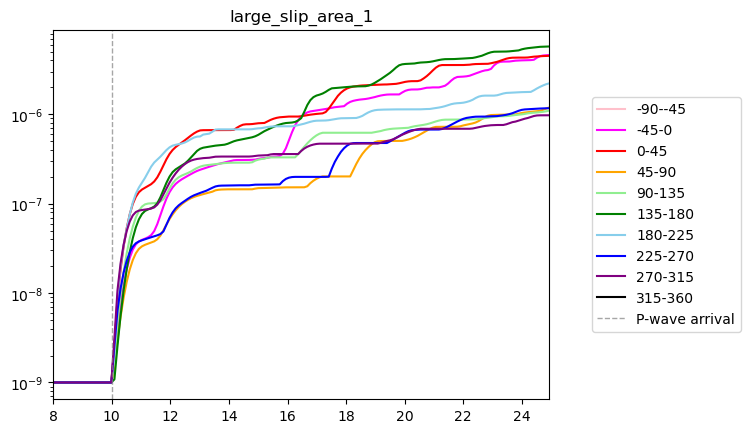

In [174]:
# Make station_plots_by_azimuth_difference

for rupt in dirs_list[:1]:
    
    rupt_path = results_path + rupt + '/'
    print(rupt)
    
    plt.figure(dpi = 100, facecolor = 'white')
    plt.title(rupt)

    plot_colors = ['pink', 'magenta', 'red', 'orange', 'lightgreen', 'green', 'skyblue', 'blue', 'purple', 'black']
    az_labels = ['-90--45', '-45-0', '0-45', '45-90', '90-135', '135-180', '180-225', '225-270', '270-315', '315-360']

    for g in range(len(mean_time_strain)):
        time = mean_time_strain[g]
        strain = mean_peak_strain[g]
        plt.plot(time, strain, color = plot_colors[g], label = az_labels[g])
    plt.xlim(mean_time_strain[1,0], mean_time_strain[1,-1])
    plt.semilogy()
    
    plt.axvline(10, color = 'gray', linestyle = 'dashed', lw = 1, alpha = 0.7, label = 'P-wave arrival')
    
    plt.legend(loc = 'center right', bbox_to_anchor = (0.9, 0.5, 0.5, 0))   
    
    plt.show()
        
#         # Create folder for the event
#         fig_save_dir = plot_save_path + 'station_plots_by_az_diff/' + rupt + '/'
#         # print(fig_save_dir)
#         if os.path.isdir(fig_save_dir):
#             pass
#         else:
#             os.makedirs(fig_save_dir)
#         # plt.savefig(fig_save_dir + sta + '.png', format = 'PNG')
#         # plt.close()


In [52]:
### Process strain data ###

def process_strain(strain_data, theoretical_p_arrival):
    
    strain = pd.read_csv(strain_path, sep = '\s+', skiprows = 16, names = ['time', 'xx', 'yy', 'zz', 'xy', 'xz', 'yz'])

    # Calculate horizontal RMS strain
    time_strain = strain.time.values
    xx_strain = strain.xx.values
    xy_strain = strain.xy.values
    yy_strain = strain.yy.values
    rms_strain = np.sqrt((xx_strain**2 + xy_strain**2 + yy_strain**2)/3)

    # Calculate peak strain
    strain_p_i = np.abs(time_strain - theo_p_arr).argmin() # Get the index where the P-wave arrives
    mod_rms_strain = rms_strain.copy()
    p_arr_strain = rms_strain[strain_p_i]
    mod_rms_strain[:strain_p_i] = p_arr_strain # Strain before the P wave is set to be the same as the strain AT the P wave
    peak_strain = mod_rms_strain.copy()
    for k in range(0,len(mod_rms_strain)):
        if k == 0:
            strain = mod_rms_strain[0]
            max_strain = strain
        else:
            # Grab progressively longer windows and save the biggest strain
            strain = mod_rms_strain[:k+1] # Has to be k+1 because slicing doesn't include last one
            max_strain = max(strain)
        # Put peak strain back into the output stream
        peak_strain[k] = max_strain 
    
    return time_strain, xx_strain, xy_strain, yy_strain, rms_strain, peak_strain

### Process GNSS data to match the strain processing ###

def process_disp(disp_data, theoretical_p_arrival):
    
    disp = pd.read_csv(disp_path, sep = '\s+', skiprows = 13, names = ['time', 'x', 'y', 'z'])

    # Calculate horizontal RMS GNSS  
    time_gnss = disp.time.values
    x_gnss = disp.x.values
    y_gnss = disp.y.values
    rms_gnss = np.sqrt((x_gnss**2 + y_gnss**2)/2)

    # Calculate peak GNSS
    gnss_p_i = np.abs(time_gnss - theo_p_arr).argmin() # Get the index where the P-wave arrives
    mod_rms_gnss = rms_gnss.copy()
    p_arr_gnss = rms_gnss[gnss_p_i]
    mod_rms_gnss[:gnss_p_i] = p_arr_gnss # Strain before the P wave is set to be the same as the strain AT the P wave
    peak_gnss = mod_rms_gnss.copy()
    for k in range(0,len(mod_rms_gnss)):
        if k == 0:
            gnss = mod_rms_gnss[0]
            max_gnss = gnss
        else:
            # Grab progressively longer windows and save the biggest strain
            gnss = mod_rms_gnss[:k+1] # Has to be k+1 because slicing doesn't include last one
            max_gnss = max(gnss)
        # Put peak strain back into the output stream
        peak_gnss[k] = max_gnss 
    
    return time_gnss, x_gnss, y_gnss, rms_gnss, peak_gnss